<a href="https://colab.research.google.com/github/lmuppala724/denoising_images/blob/main/AddingNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def poisson_noise(img, scale):
  noisy_img = np.random.poisson(img*scale)
  return noisy_img

In [12]:
import cv2

def noise(img, std):
  noise = np.random.randn(*img.shape)
  return img + noise*std, noise    

In [12]:
#Ordering the training dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Dissertation/Dataset/train"
directory_en = os.fsencode(folder_str)

ordered_train = "/content/drive/MyDrive/Dissertation/Dataset/ordered_train"

index = 0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".jpg"):
    index += 1
    image = Image.open(subdir)
    path = f"{ordered_train}/train_{index}.tiff" #Creates a path to store the image
    tf.imwrite(path, np.asarray(image))




In [13]:
# Creating gray training dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Dissertation/Dataset/ordered_train"
directory_en = os.fsencode(folder_str)

grayimage_folder = "/content/drive/MyDrive/Dissertation/Dataset/gray_train"

index=0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".tiff"):
    index += 1 
    image = Image.open(subdir).convert('L') # Converts the image to grayscale
    path = f"{grayimage_folder}/train_gray_{index}.tiff" # Creates the path to store the images
    tf.imwrite(path, np.asarray(image))
    



In [15]:
# Creating poisson noise added Gray training dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Dissertation/Dataset/gray_train"
directory_en = os.fsencode(folder_str)

gray_noise_image_folder = "/content/drive/MyDrive/Dissertation/Dataset/gray_poisson_noise_train"

index=0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".tiff"):
    index += 1 
    image = Image.open(subdir) # Opens each image            
    noise_image = poisson_noise(np.asarray(image), 1/6) * 6 # Adds poisson noise by scaling the image down by 1/6 and then scaling up by 6
    plt.show()
    path = f"{gray_noise_image_folder}/train_gray_noise_{index}.tiff" # Creates the path to store the images
    tf.imwrite(path, noise_image.astype(np.int32))


In [16]:
# Creating Poisson Noise Added Colour Image Dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Dissertation/Dataset/ordered_train"
directory_en = os.fsencode(folder_str)

colour_noise_image_folder = "/content/drive/MyDrive/Dissertation/Dataset/colour_poisson_noise_train"

index=0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".tiff"):
    index += 1 
    image = Image.open(subdir) # Opens each image
    noise_image = poisson_noise(np.asarray(image), 1/6) * 6 # Adds poisson noise by scaling the image down by 1/6 and then scaling up by 6
    path = f"{colour_noise_image_folder}/train_colour_noise_{index}.tiff" # Creates the path to store the images
    tf.imwrite(path, noise_image.astype(np.int32))



Original image


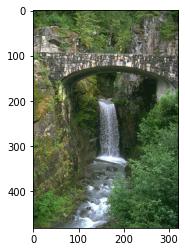

Poisson noise scale - 1/10


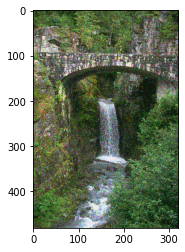

Gray Noise image


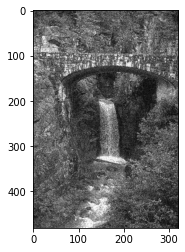

Colour Noise Image


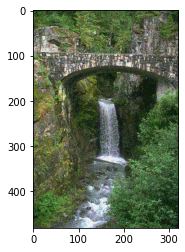

In [19]:
import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir
from skimage import io

rgb_img_path = "/content/drive/MyDrive/Dissertation/Dataset/ordered_train/train_142.tiff"
rgb_img = Image.open(rgb_img_path)

numpydata = asarray(rgb_img)
poisson_img_10 = poisson_noise(numpydata, 1/10) * 10

print("Original image")
plt.imshow(rgb_img, vmin=0, vmax=255)
plt.show()

print("Poisson noise scale - 1/10")
plt.imshow(poisson_img_10.astype(np.int32), vmin=0, vmax=255)
plt.show()

print("Gray Noise image")
test1 = "/content/drive/MyDrive/Dissertation/Dataset/gray_poisson_noise_train/train_gray_noise_142.tiff"
test1_img = Image.open(test1)
plt.imshow(test1_img, vmin=0, vmax=255)
plt.show()

print("Colour Noise Image")
test2 = "/content/drive/MyDrive/Dissertation/Dataset/colour_poisson_noise_train/train_colour_noise_142.tiff"
im = io.imread(test2)
plt.imshow(im)
plt.show()








